In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
files = ['results_3CNN.csv', 'results_cnn_trad_fpool3_simple.csv', 
         'results_cnn_trad_fpool3.csv', 'results_TCResNet8.csv']

In [3]:
labels = [file[len('results_') : file.find('.csv')] for file in files]
results = [pd.read_csv(file) for file in files]

In [4]:
results[0].head()

,train.way,test.way,train.shot,test.shot,train.query,test.query,train.episodes,test.episodes,background,silence,unknown,epochs,lr,wd,train.acc,val.acc,timestamp
0,2,2,1,1,5,15,200,100,False,False,False,200,0.001,0.0,0.8065,0.765333,2019-10-28 18:36:06
1,2,2,5,5,5,15,200,100,True,False,False,200,0.001,0.0,0.9135,0.835333,2019-10-28 18:36:15
2,4,4,10,10,5,15,200,100,False,False,True,200,0.001,0.0,0.9282,0.773333,2019-10-28 19:27:53
3,4,4,10,10,5,15,200,100,True,True,False,200,0.001,0.0,0.8682,0.639467,2019-10-28 19:28:21
4,4,4,10,10,5,15,200,100,True,False,True,200,0.001,0.0,0.9080,0.709733,2019-10-28 19:28:59


In [5]:
way = 4 # N-Way classification to compare

In [6]:
results = [df[df['train.way'] == way] for df in results]

In [7]:
shots = sorted(results[0]['train.shot'].unique())
print(shots)

[1, 5, 10, 15, 20]


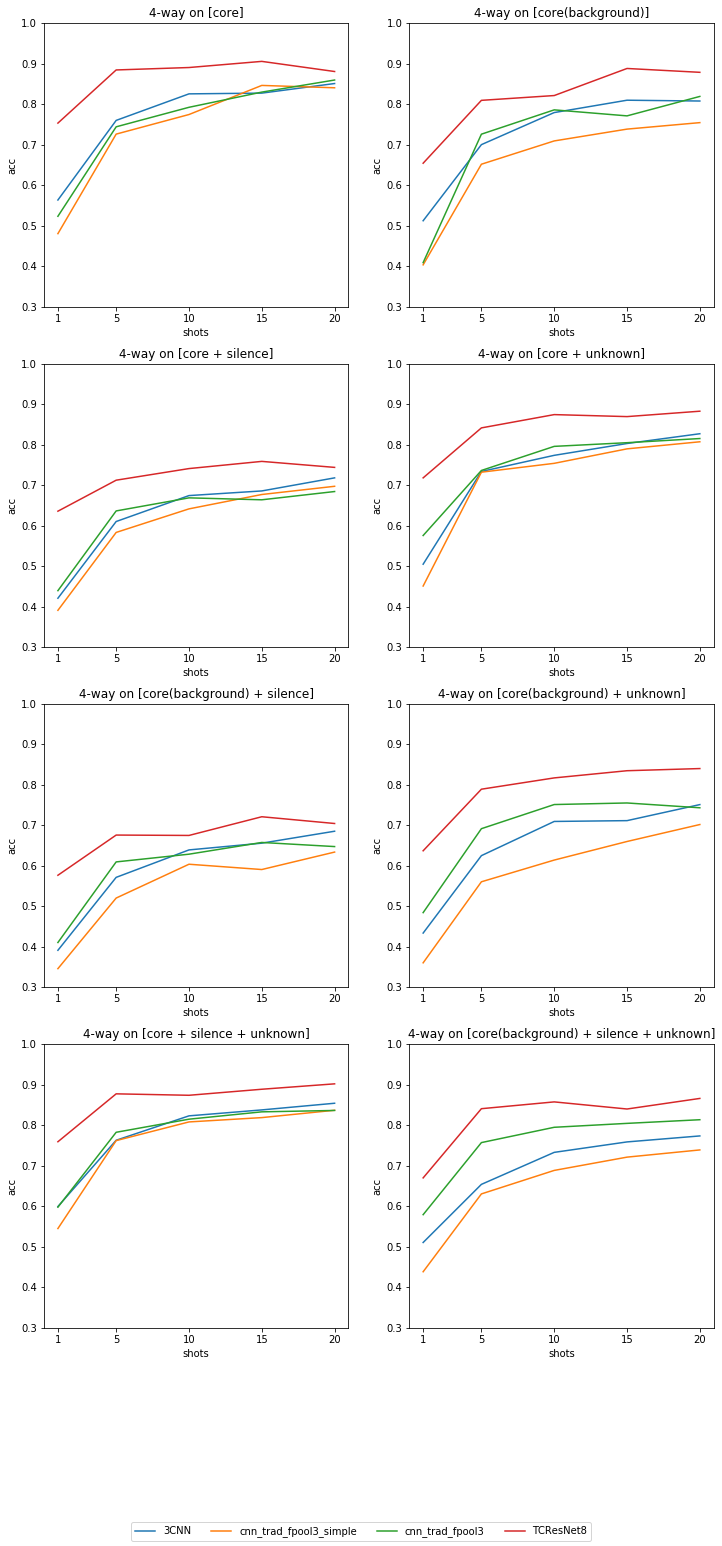

In [8]:
fig = plt.figure(figsize=(12,24))

for i in range(8):
    
    include_background = False
    include_silence = False
    include_unknown = False
    title = 'core'

    if i == 1:
        include_background = True
        title = 'core(background)'
    elif i == 2:
        include_silence = True
        title = 'core + silence'
    elif i == 3:
        include_unknown = True
        title = 'core + unknown'
    elif i == 4:
        include_background = True
        include_silence = True
        title = 'core(background) + silence'
    elif i == 5:
        include_background = True
        include_unknown = True
        title = 'core(background) + unknown'
    elif i == 6:
        include_unknown = True
        include_silence = True
        title = 'core + silence + unknown'
    elif i == 7:
        include_background = True
        include_unknown = True
        include_silence = True
        title = 'core(background) + silence + unknown'
        
    ax = fig.add_subplot(4,2,i+1)
   
    for i, df in enumerate(results):
        df = df[(df['background'] == include_background) & 
                 (df['silence'] == include_silence) & 
                 (df['unknown'] == include_unknown)][['train.shot','val.acc']]
        
        acc = df.sort_values('train.shot')['val.acc'].values
        ax.plot(shots, acc, label=labels[i])
    
    ax.set_title('{}-way on [{}]'.format(way, title))
    ax.set_ylabel('acc')
    ax.set_xlabel('shots')
    ax.set_xticks(shots)
    ax.set_yticks(np.linspace(0.3,1.0,8))
    
handles, labels = ax.get_legend_handles_labels()
_ = fig.legend(handles, labels, loc='lower center', ncol=4)